In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import model_functions as mf

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
plot_colors = ['Cornflowerblue','#C43714','gold','#076B00','#8368CC','darkorange', 'navy', 'lightskyblue','#DA3287', '#FFFF31']
sns.set_palette(plot_colors)

In [4]:
df = pd.read_csv('../data/data_bank_account.csv')
print('data frame shape :', df.shape)
df.head()

data frame shape : (23524, 13)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# drop columns I don't need for my model
df.drop('year', axis=1, inplace=True)
df.drop('uniqueid', axis=1, inplace=True)
df.head()

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
df.columns

Index(['country', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   bank_account            23524 non-null  object
 2   location_type           23524 non-null  object
 3   cellphone_access        23524 non-null  object
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


Convert categorical features

In [8]:
# categorical features
cat_features = ['country', 'bank_account', 'location_type',
                    'cellphone_access', 'gender_of_respondent',
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type']



In [9]:
for item in cat_features:
    print(item, len(df[item].unique()), df[item].unique())

country 4 ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
bank_account 2 ['Yes' 'No']
location_type 2 ['Rural' 'Urban']
cellphone_access 2 ['Yes' 'No']
gender_of_respondent 2 ['Female' 'Male']
relationship_with_head 6 ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
marital_status 5 ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
education_level 6 ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']
job_type 10 ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']


In [10]:
df['bank_account'] = df['bank_account'].map({'No': 0, 'Yes': 1})
df['location_type'] = df['location_type'].map({'Rural': 0, 'Urban': 1})
df.columns = df.columns.str.replace('location_type','Urban_location')
df['cellphone_access'] = df['cellphone_access'].map({'No': 0, 'Yes': 1})
df['gender_of_respondent'] = df['gender_of_respondent'].map({'Male': 0, 'Female': 1})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   bank_account            23524 non-null  int64 
 2   Urban_location          23524 non-null  int64 
 3   cellphone_access        23524 non-null  int64 
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  int64 
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [11]:
# get dummies for categorical values
df = pd.get_dummies(df, columns=['country',
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   bank_account                                     23524 non-null  int64
 1   Urban_location                                   23524 non-null  int64
 2   cellphone_access                                 23524 non-null  int64
 3   household_size                                   23524 non-null  int64
 4   age_of_respondent                                23524 non-null  int64
 5   gender_of_respondent                             23524 non-null  int64
 6   country_Kenya                                    23524 non-null  bool 
 7   country_Rwanda                                   23524 non-null  bool 
 8   country_Tanzania                                 23524 non-null  bool 
 9   country_Uganda                                   2

In [13]:
cat_features = ['bank_account','Urban_location', 'cellphone_access', 'gender_of_respondent', 'country_Kenya',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed']
df[cat_features] = df[cat_features].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   bank_account                                     23524 non-null  category
 1   Urban_location                                   23524 non-null  category
 2   cellphone_access                                 23524 non-null  category
 3   household_size                                   23524 non-null  int64   
 4   age_of_respondent                                23524 non-null  int64   
 5   gender_of_respondent                             23524 non-null  category
 6   country_Kenya                                    23524 non-null  category
 7   country_Rwanda                                   23524 non-null  category
 8   country_Tanzania                                 23524 non-null  category
 9   country_Uganda   

Train-Test-Split and scaling with standartscaler

In [15]:
selected_features = ['Urban_location', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'country_Kenya',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed']

In [16]:
X = df[selected_features]
y = df['bank_account']

In [17]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    stratify=y)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16466, 36)
(7058, 36)
(16466,)
(7058,)


scaling of the features houselhold_size and age_of_respondent

In [19]:
X_train_2_sc = X_train[['household_size','age_of_respondent']]
X_test_2_sc = X_test[['household_size','age_of_respondent']]

In [20]:
# Scaling with MinMaxScaler
normalizer = MinMaxScaler()
X_train_sc = normalizer.fit_transform(X_train_2_sc)
X_test_sc = normalizer.transform(X_test_2_sc)

add the scaled features back to the dataframe

In [21]:
# Concatenating scaled and dummy columns 
X_train_prepro = np.concatenate([X_train_sc, X_train.drop(['household_size','age_of_respondent'], axis=1)], axis=1)
X_test_prepro = np.concatenate([X_test_sc, X_test.drop(['household_size','age_of_respondent'], axis=1)], axis=1)

In [22]:
X_train

,Urban_location,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Child,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
6345,1,1,5,28,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
17322,1,1,3,63,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
22904,0,0,1,65,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
13745,0,1,7,18,0,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
19371,1,0,1,70,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23331,0,1,3,26,1,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
18130,1,1,3,46,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
20442,0,1,5,70,0,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
17678,1,0,1,43,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


KNN Models with different parameters

In [23]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(5,55,5): 
        knn_model = mf.train_model(KNeighborsClassifier,
                           X_train_prepro,
                           y_train,
                           n_neighbors=neigh,
                           p=metr,
                           weights='uniform')
        
        loop_name =  'knn_metr_' + str(metr) + '_neigh_' + str(neigh)
        #knn_metrics_dict = mf.model_scores_df(knn_model, X_train, X_test, y_train, y_test , loop_name)
        knn_error_lst.append(mf.model_scores_df(knn_model, X_train_prepro, X_test_prepro, y_train, y_test , loop_name))
        
knn_error_df = pd.DataFrame(knn_error_lst)
knn_error_df['delta_gmean'] = abs(knn_error_df['train_gmean'] - knn_error_df['test_gmean'])
knn_error_df


,model_name,train_accuracy,test_accuracy,train_gmean,test_gmean,train_sensitivity,test_sensitivity,train_specificity,test_specificity,delta_gmean
0,knn_metr_1_neigh_5,0.90,0.88,0.68,0.59,0.47,0.37,0.98,0.96,0.09
1,knn_metr_1_neigh_10,0.90,0.88,0.60,0.56,0.36,0.32,0.98,0.97,0.04
2,knn_metr_1_neigh_15,0.89,0.88,0.60,0.57,0.37,0.34,0.98,0.97,0.03
3,knn_metr_1_neigh_20,0.89,0.88,0.57,0.54,0.33,0.30,0.98,0.98,0.03
4,knn_metr_1_neigh_25,0.89,0.88,0.59,0.56,0.36,0.32,0.98,0.97,0.03
5,knn_metr_1_neigh_30,0.89,0.88,0.56,0.53,0.32,0.29,0.98,0.98,0.03
6,knn_metr_1_neigh_35,0.89,0.88,0.56,0.54,0.32,0.30,0.98,0.98,0.02
7,knn_metr_1_neigh_40,0.89,0.88,0.54,0.53,0.30,0.28,0.98,0.98,0.01
8,knn_metr_1_neigh_45,0.89,0.88,0.55,0.54,0.30,0.29,0.98,0.98,0.01
9,knn_metr_1_neigh_50,0.89,0.88,0.54,0.52,0.29,0.28,0.98,0.98,0.02


In [24]:
knn_error_df.sort_values(by = ['test_gmean', 'delta_gmean'], ascending=[False, True]).head(7)

,model_name,train_accuracy,test_accuracy,train_gmean,test_gmean,train_sensitivity,test_sensitivity,train_specificity,test_specificity,delta_gmean
20,knn_metr_3_neigh_5,0.91,0.88,0.68,0.60,0.48,0.37,0.98,0.96,0.08
0,knn_metr_1_neigh_5,0.90,0.88,0.68,0.59,0.47,0.37,0.98,0.96,0.09
10,knn_metr_2_neigh_5,0.91,0.88,0.68,0.59,0.48,0.37,0.98,0.96,0.09
2,knn_metr_1_neigh_15,0.89,0.88,0.60,0.57,0.37,0.34,0.98,0.97,0.03
11,knn_metr_2_neigh_10,0.90,0.88,0.60,0.57,0.37,0.33,0.98,0.97,0.03
12,knn_metr_2_neigh_15,0.89,0.88,0.60,0.57,0.37,0.34,0.98,0.97,0.03
21,knn_metr_3_neigh_10,0.90,0.88,0.60,0.57,0.36,0.33,0.98,0.97,0.03


/Users/maritaschmidt/NEUE_FISCHE/ml_project_financial_inclusion/models/model_functions.py:210: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


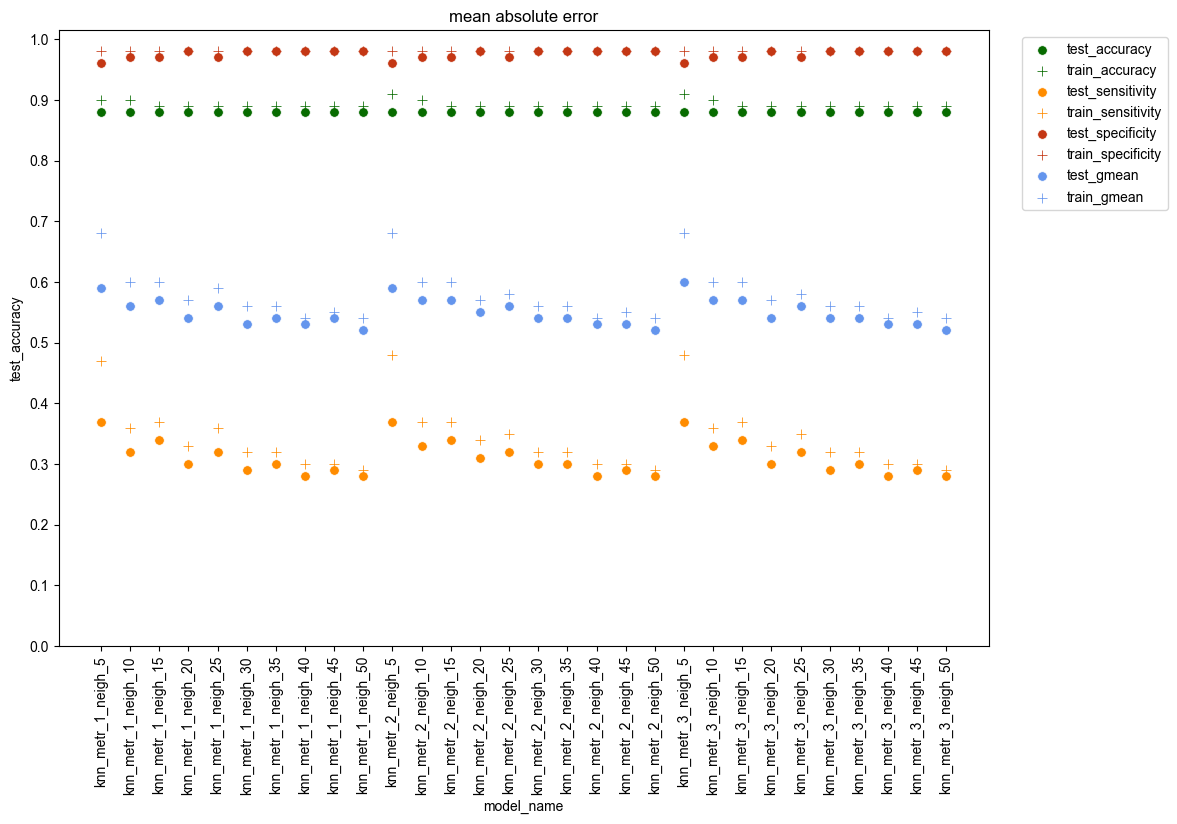

In [25]:
mf.metrics_comp_scatterplot(knn_error_df)

Specificity is relatively unaffected by the different algorithm parameters. The Majority Class is always predicted similarly well. The situation is different for the sensitivity representing the minority class. Changing the parameters has a high influence on the prediction of this class.   
For Sensitivity and gmean the range up to 26  looks interesting. I will break this down even more finely.  
(Later the range was reduced to 8-16, I can always adjust the loop)

In [26]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(8,21,2): 
        knn_model = mf.train_model(KNeighborsClassifier,
                           X_train_prepro,
                           y_train,
                           n_neighbors=neigh,
                           p=metr,
                           weights='uniform')
        
        loop_name =  'knn_metr_' + str(metr) + '_neigh_' + str(neigh)
        #knn_metrics_dict = mf.model_scores_df(knn_model, X_train, X_test, y_train, y_test , loop_name)
        knn_error_lst.append(mf.model_scores_df(knn_model, X_train_prepro, X_test_prepro, y_train, y_test , loop_name))
        
knn_error_df = pd.DataFrame(knn_error_lst)
knn_error_df['delta_gmean'] = abs(knn_error_df['train_gmean'] - knn_error_df['test_gmean'])
knn_error_df.sort_values(by = ['test_gmean', 'delta_gmean'], ascending=[False, True])


,model_name,train_accuracy,test_accuracy,train_gmean,test_gmean,train_sensitivity,test_sensitivity,train_specificity,test_specificity,delta_gmean
2,knn_metr_1_neigh_12,0.89,0.88,0.59,0.57,0.35,0.33,0.98,0.98,0.02
0,knn_metr_1_neigh_8,0.90,0.88,0.60,0.57,0.36,0.33,0.98,0.97,0.03
7,knn_metr_2_neigh_8,0.90,0.88,0.60,0.57,0.37,0.33,0.98,0.98,0.03
8,knn_metr_2_neigh_10,0.90,0.88,0.60,0.57,0.37,0.33,0.98,0.97,0.03
14,knn_metr_3_neigh_8,0.90,0.88,0.60,0.57,0.37,0.33,0.98,0.98,0.03
15,knn_metr_3_neigh_10,0.90,0.88,0.60,0.57,0.36,0.33,0.98,0.97,0.03
3,knn_metr_1_neigh_14,0.89,0.88,0.58,0.56,0.34,0.32,0.98,0.98,0.02
10,knn_metr_2_neigh_14,0.89,0.88,0.58,0.56,0.34,0.32,0.98,0.98,0.02
17,knn_metr_3_neigh_14,0.89,0.88,0.58,0.56,0.34,0.32,0.98,0.98,0.02
9,knn_metr_2_neigh_12,0.89,0.88,0.59,0.56,0.35,0.32,0.98,0.97,0.03


/Users/maritaschmidt/NEUE_FISCHE/ml_project_financial_inclusion/models/model_functions.py:210: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


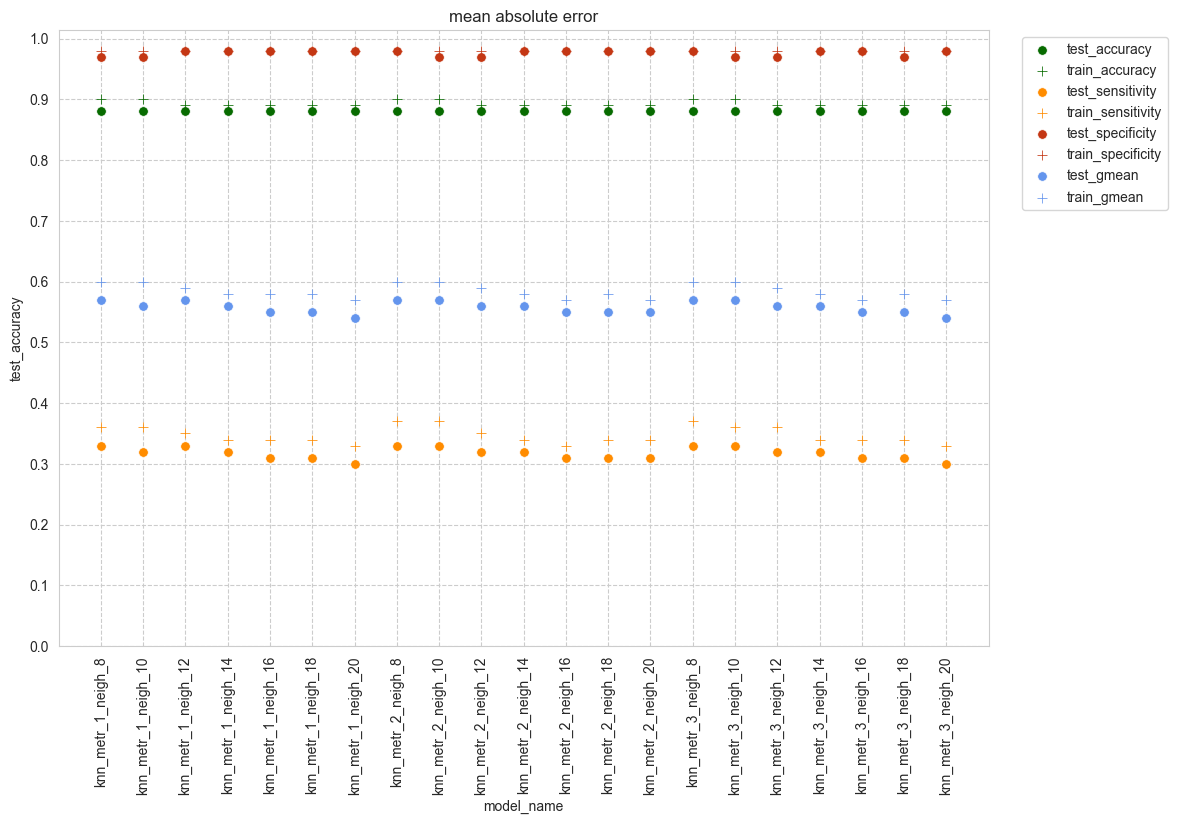

In [27]:
mf.metrics_comp_scatterplot(knn_error_df)

From these I would choose manhattan distance (p=1) and neighbours = 12 as the most optimal combination. 

In [35]:
knn_model_p1_n12 = mf.train_model(KNeighborsClassifier,
                           X_train_prepro,
                           y_train,
                           n_neighbors=12,
                           p=1,
                           weights='uniform')

In [36]:
knn_p1_n12_dict = mf.model_scores_df(knn_model_p1_n12, X_train_prepro, X_test_prepro, y_train, y_test , 'KNN_p1_n12')
knn_p1_n12_dict

{'model_name': 'KNN_p1_n12',
 'train_accuracy': 0.89,
 'test_accuracy': 0.88,
 'train_gmean': 0.59,
 'test_gmean': 0.57,
 'train_sensitivity': 0.35,
 'test_sensitivity': 0.33,
 'train_specificity': 0.98,
 'test_specificity': 0.98}

In [38]:
knn_p1_n12_cmx = confusion_matrix(y_test, knn_model_p1_n12.predict(X_test_prepro))
knn_p1_n12_cmx

array([[5917,  147],
       [ 667,  327]])

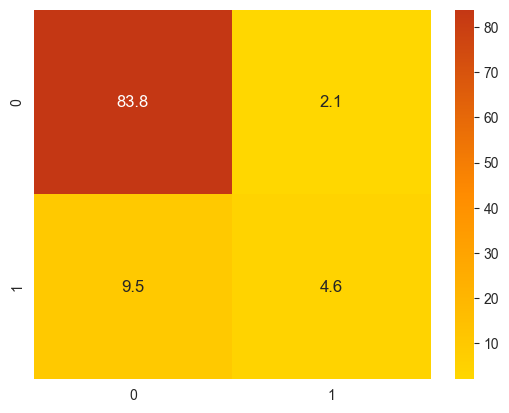

In [39]:
mf.conf_matrix_heatmap_perc(knn_p1_n12_cmx)

In [44]:
def metrics_line_scatterplot(metric_dict):
    """
    creates a special metrics plot out of the metrics dictionary

    Args:
        metric_dict (_type_): _description_
    """
    local_metric_df = pd.DataFrame([metric_dict])
    g = sns.lineplot(x = [0,1], y = [0,1], color = 'lightgrey')
    g = sns.scatterplot(x = local_metric_df.train_accuracy, y = local_metric_df.test_accuracy, color = '#076B00', s=48)
    g = sns.scatterplot(x = local_metric_df.train_sensitivity, y = local_metric_df.test_sensitivity, color = 'darkorange',  s=48)
    g = sns.scatterplot(x = local_metric_df.train_specificity, y = local_metric_df.test_specificity, color = '#C43714',  s=48)
    g = sns.scatterplot(x = local_metric_df.train_gmean, y = local_metric_df.test_gmean, color = 'Cornflowerblue',  s=48)
    g.set_title(local_metric_df.model_name[0])
    g.set_xlabel('train metrics')
    g.set_ylabel('test metrics')
    g.legend(loc='lower right', 
             #bbox_to_anchor=(0.5, 0.5),
             labels=['proportion 0.5',
                    '',
                    'accuracy',
                    'sensitivity',
                    'specificity',
                    'gmean',
             ])
    plt.yticks(list(np.arange(0,1.1,0.1).round(1)))
    plt.schow()

    return

AttributeError: module 'matplotlib.pyplot' has no attribute 'schow'

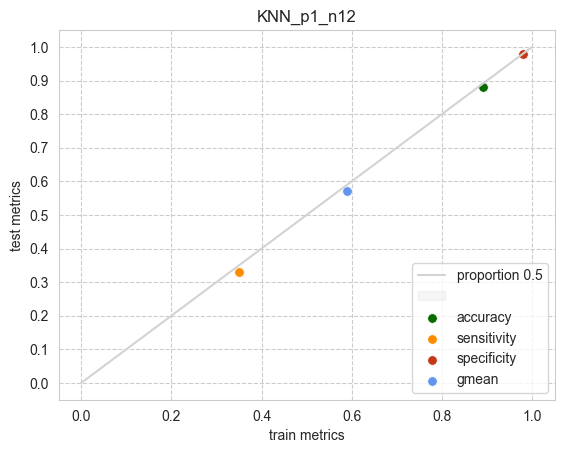

In [45]:
metrics_line_scatterplot(knn_p1_n12_dict)
plt.savefig('../plots_and_pictures/model_knn_p1_n12_scatter.png', transparent=False)

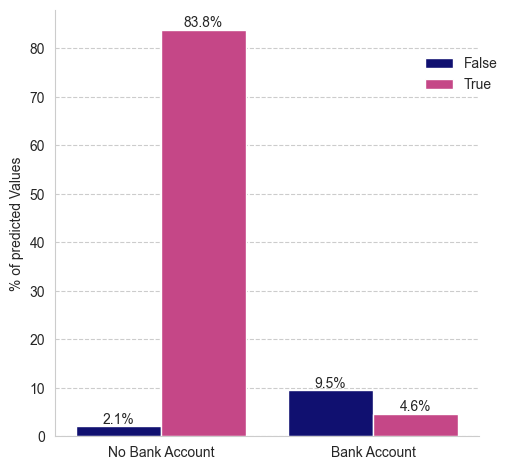

In [ ]:
mf.conf_matrix_as_bar_perc(knn_p1_n12_cmx)
plt.savefig('../plots_and_pictures/model_knn_p1_n12_barplot.png', transparent=False)